In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('EDA1.csv')
df.drop(columns = ['Day'], axis = 1, inplace = True)
well_1 = df[df['Well Name'] == 1]
well_1.drop(columns = ['Well Name'], axis = 1, inplace = True)
well_1.reset_index(inplace = True, drop = True)
well_1 = pd.Series(data = well_1['Oil Volume'])
well_1 = well_1[well_1 > 0]
well_1.reset_index(inplace = True, drop = True)

C:\Users\csmid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [37]:
#This function detects outliers
from numpy import percentile
outliers_index = []
outliers_value = []
multiplier = 1.5
def outlier_finder(data, timesteps, multiplier):
    outliers_index = []
    outliers_value = []
    for i in range(0, len(well_1), timesteps):
        q25 = percentile(data[i:i+timesteps], 25)
        q75 = percentile(data[i:i+timesteps], 75)
        iqr = q75 - q25
        cut_off = iqr * multiplier
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[i:i+timesteps] if x < lower or x > upper]
        outliers_value.extend(outliers)
        for idx, val in enumerate(data[i:i+timesteps]):
            if val in outliers:
                outliers_index.append(idx + i)
    index = outliers_index
    value = outliers_value
    return index, value

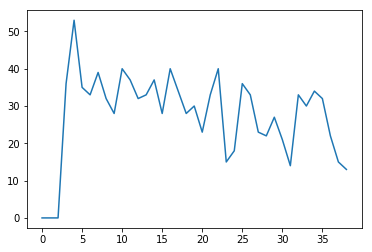

In [39]:
#Plots the number of outliers the outlier finder function detects at different timesteps 
num_of_outliers = []
for i in range(1,40):
    x, y = outlier_finder(well_1, i, multiplier)
    length = len(x)
    num_of_outliers.append(length)
plt.plot(num_of_outliers) 

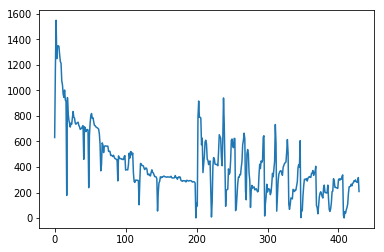

In [40]:
plt.plot(well_1)

Because of the significant difference in behavior before and index 200, I will model the decline using data beyond the 202 index. The seasonality and lack of trend make me reluctant to delete clean this. It is hard for me to use my judgement on which points are outliers and which are not outliers. This is one limitation to using my methodology

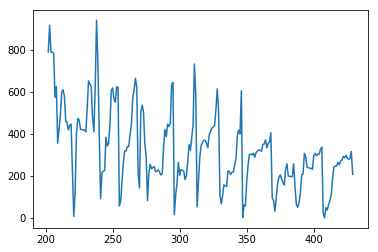

In [56]:
plt.plot(well_1[202:])

In [57]:
well_1_clean = well_1[202:]
well_1_clean.reset_index(inplace = True, drop = True)
well_1_clean.to_csv(r'C:\Users\csmid\Volve Project\well_1_clean.csv', index = None, header = True)